# 1. Un petit exercice: la chaleur latente de fusion de la glace


In [ ]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


**1. Lire les donn ́ees dans R.**

In [ ]:
#1. Lecture des données
# Méthode A
methode_A = np.array([79.98, 80.04, 80.02, 80.04, 80.03, 80.03, 80.04, 79.97, 80.05, 80.03, 80.02, 80.00, 80.02])

# Méthode B
methode_B = np.array([80.02, 79.94, 79.98, 79.97, 79.97, 80.03, 79.95, 79.97])

In [ ]:
# Mise en DataFrame pour faciliter la manipulation
data = pd.DataFrame({
    'Méthode': ['A']*len(methode_A) + ['B']*len(methode_B),
    'Valeur': np.concatenate([methode_A, methode_B])
})

In [ ]:
data.count()

,0
Méthode,21
Valeur,21


In [ ]:
data.head()

,Méthode,Valeur
0,A,79.98
1,A,80.04
2,A,80.02
3,A,80.04
4,A,80.03




---



**2. Comparer les distributions `a l’aide de boxplot()(s). Conclusions ?**

<ipython-input-10-ac084e73de9e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Méthode', y='Valeur', data=data, palette='Set2')


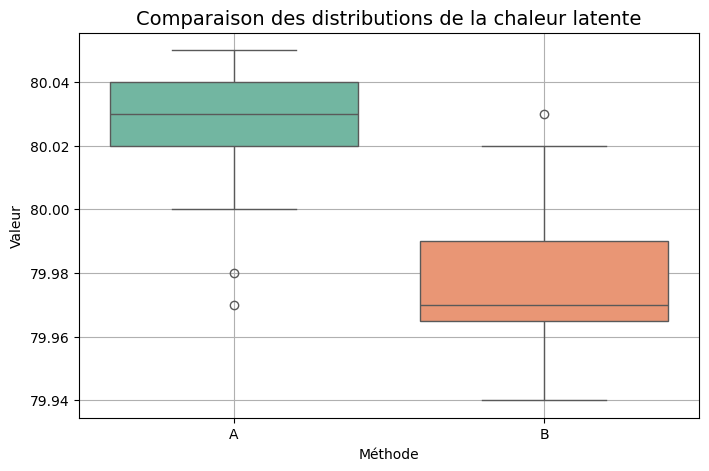

In [ ]:
#2. Comparaison des distributions par Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Méthode', y='Valeur', data=data, palette='Set2')
plt.title('Comparaison des distributions de la chaleur latente', fontsize=14)
plt.grid(True)
plt.show()

**Conclusions visuelles :**
* On observe que les deux distributions sont proches.
* La médiane de A est légèrement plus élevée que celle de B.

* La variabilité (dispersion) semble plus grande dans A car il y a plus d'outliers.

* La méthode B semble plus stable (moins d'outliers).

Donc visuellement :Les deux distributions sont proches, mais A présente plus de dispersion.

**Un boxplot n'indique pas directement si la moyenne est différente ou si la différence est significative → Pour cela, il faut vraiment faire les tests statistiques**`(t.test()`, `var.test()`, `wilcox.test())`.



---



**3. Tester pour l’ ́egalit ́e des moyennes avec t.test().Quelles sont les
hypoth`eses de ce test ? Conclusions ?**

In [ ]:
#3. Test d'égalité des moyennes (t-test)
# Test de Student sans hypothèse d'égalité de variance (Welch's t-test)
#  Hypothèses :
# H0 : Les moyennes des deux méthodes sont égales.
# H1 : Les moyennes sont différentes.
t_stat, p_val = stats.ttest_ind(methode_A, methode_B, equal_var=False)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")


T-statistic: 3.2499, P-value: 0.0069


**Conclusion : p-value < 0.05, on rejette H0 → les moyennes sont différentes.**



---



**4. Tester l’hypoth`ese d’ ́egalit ́e des variances `a l’aide de var.test().
Conclusions ?**

In [ ]:
#4. Test d'égalité des variances (F-test)
# Hypothèses :
# H0 : Variances égales.
# H1 : Variances différentes.
f_stat, p_var = stats.levene(methode_A, methode_B)

print(f"F-statistic: {f_stat:.4f}, P-value: {p_var:.4f}")

F-statistic: 0.2158, P-value: 0.6476


**p-value > 0.05 , on peut supposer que les variances sont égales.**



---



**5. Appliquer un t-test classique qui suppose l’ ́egalit ́e des variances. Con-
clusions ?**

In [ ]:
#5. t-test classique sous hypothèse d'égalité de variance
# t-test classique (equal_var=True)
#  Hypothèses :
# H0 : Les moyennes des deux méthodes sont égales.
# H1 : Les moyennes sont différentes.
t_stat_classic, p_val_classic = stats.ttest_ind(methode_A, methode_B, equal_var=True)

print(f"T-statistic (classique): {t_stat_classic:.4f}, P-value: {p_val_classic:.4f}")



T-statistic (classique): 3.4722, P-value: 0.0026


**Conclusion : p-value < 0.05 ➔ on rejette H₀ ➔ les moyennes sont significativement différentes.**



---



**6. Tous les tests ci-dessus supposent la normalit ́e des deux  ́echantillons.
Appliquer un test de rang sign ́e, wilcox.test(). Quelles sont les hypoth`eses
de ce test ? Conclusions ?**

In [ ]:
# 6. Test de Wilcoxon (test non paramétrique)
# Comme les échantillons sont indépendants : Mann-Whitney U Test
u_stat, p_wilcox = stats.mannwhitneyu(methode_A, methode_B, alternative='two-sided')

print(f"U-statistic: {u_stat:.4f}, P-value: {p_wilcox:.4f}")

# Hypothèses :
# H0 : Les deux distributions sont identiques.
# H1 : Les distributions sont différentes.

U-statistic: 89.0000, P-value: 0.0075


**Conclusion : p-value < 0.05 → distributions différentes.**



---



**7. Tester la normalit ́e des donn ́ees avec qqplot() et des tests appropri ́es
(Shapiro-Wilk, Kolmogorov). Conclusions ?**

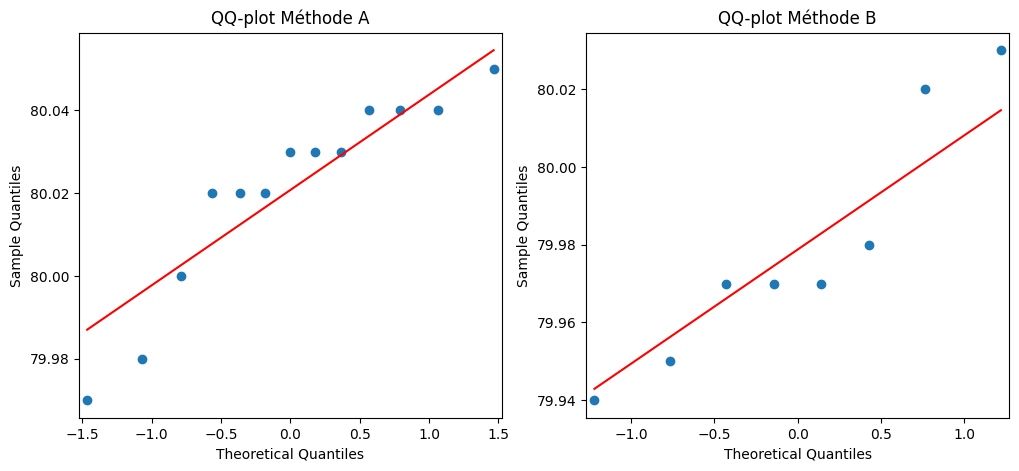

Shapiro Méthode A: p-value = 0.0553
Shapiro Méthode B: p-value = 0.2403
Kolmogorov Méthode A: p-value = 0.3072
Kolmogorov Méthode B: p-value = 0.6508


In [ ]:
#7. Test de normalité (QQPlot, Shapiro-Wilk, Kolmogorov-Smirnov)
# QQ-Plot
import statsmodels.api as sm

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Méthode A
sm.qqplot(methode_A, line='s', ax=ax[0])
ax[0].set_title('QQ-plot Méthode A')

# Méthode B
sm.qqplot(methode_B, line='s', ax=ax[1])
ax[1].set_title('QQ-plot Méthode B')

plt.show()
#Pour Shapiro-Wilk et Kolmogorov-Smirnov, c'est toujours :

#H₀ (hypothèse nulle) :➔ Les données suivent une loi normale.

#H₁ (hypothèse alternative) :➔ Les données ne suivent pas une loi normale.

# Test de Shapiro-Wilk
shapiro_A = stats.shapiro(methode_A)
shapiro_B = stats.shapiro(methode_B)

print(f"Shapiro Méthode A: p-value = {shapiro_A.pvalue:.4f}")
print(f"Shapiro Méthode B: p-value = {shapiro_B.pvalue:.4f}")

# Test de Kolmogorov-Smirnov
ks_A = stats.kstest(methode_A, 'norm', args=(np.mean(methode_A), np.std(methode_A)))
ks_B = stats.kstest(methode_B, 'norm', args=(np.mean(methode_B), np.std(methode_B)))

print(f"Kolmogorov Méthode A: p-value = {ks_A.pvalue:.4f}")
print(f"Kolmogorov Méthode B: p-value = {ks_B.pvalue:.4f}")

# 📋 Conclusion :
# Si p-value < 0.05, on rejette l'hypothèse de normalité.

**Conclusion sur le test de normalité :**
D'après les résultats obtenus :

* Pour la Méthode A :

  * Le test de Shapiro-Wilk donne une p-value de 0.0553, supérieure à 0.05.

  * Le test de Kolmogorov-Smirnov donne une p-value de 0.3072, également supérieure à 0.05.

* Pour la Méthode B :

  * Le test de Shapiro-Wilk donne une p-value de 0.2403, supérieure à 0.05.

  * Le test de Kolmogorov-Smirnov donne une p-value de 0.6508, également supérieure à 0.05.

**Dans tous les cas, les p-values sont supérieures à 0.05, donc nous ne rejetons pas l'hypothèse nulle.**

**Conclusion finale :Il n'y a pas d'évidence statistique pour rejeter la normalité.Les données des deux méthodes peuvent être considérées comme suivant une loi normale.**

